Sum of Square Errors =  0.05102236700699482
logistic regression predicted outputs (y) = 
 [0.15822475 0.87928324 0.87928324 0.0947495  0.87928324 0.0947495
 0.0947495  0.92025259]
Original output (Y) = 
 [0 1 1 0 1 0 0 1]
Predicted Output after thresholded (1 if value >=0.5 else 0) = 

[0 1 1 0 1 0 0 1]


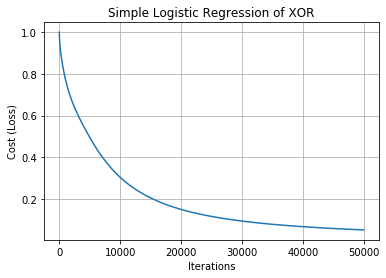

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X1 = np.array([[0, 0, 0, 0, 1, 1, 1, 1]])

X2 = np.array([[0, 0, 1, 1, 0, 0, 1, 1]])

X3 = np.array([[0, 1, 0, 1, 0, 1, 0, 1]])

Y  = np.array([[0, 1, 1, 0, 1, 0, 0, 1]])

dataset_len = Y.size
nety  = np.zeros((1, dataset_len))
y     = np.zeros((1, dataset_len)) 
a     = np.zeros((1, 1))
b     = np.zeros((1, 1))
c     = np.zeros((1, 1))
d     = np.zeros((1, 1))
se    = np.zeros((1, dataset_len))
de    = np.zeros((1, dataset_len))
epoch = 50000
n     = .1 # learning rate
it   = []
cost = []

def sig(y):
    return 1/(1+np.exp(-y))

def dsig(y):
    return y * (1-y)

def feed_forward():
    global X1, X2, X3, nety, y, a, b, c, d, se, de
    nety = a * (X1+X2+X3)**3 + b * (X1+X2+X3)**2 + c * (X1+X2+X3) + d
    y    = sig(nety)
    se   = 0.5 * (y - Y)**2
    cost.append(np.sum(se)/len(se))
    de   = (y - Y)
    return 0

def backpropagation():
    global X1, X2, X3, y, a, b, c, d, de, n

    #backpropagation
    #gradient descent calculation
    grada = np.zeros((1, 1))
    grada = np.sum(de * y*(1-y) * (X1+X2+X3)**3) / dataset_len

    gradb = np.zeros((1, 1))
    gradb = np.sum(de * y*(1-y) * (X1+X2+X3)**2) / dataset_len

    gradc = np.zeros((1, 1))
    gradc = np.sum(de * y*(1-y) * (X1+X2+X3)) / dataset_len

    gradd = np.zeros((1, 1))
    gradd = np.sum(de * y*(1-y)) / dataset_len

    #update
    a -= n * grada
    b -= n * gradb
    c -= n * gradc
    d -= n * gradd

def main():
    for i in range(epoch):
        feed_forward()
        it.append(i)
        backpropagation()

main()

print('Sum of Square Errors = ', np.sum(se)/len(se))
print('logistic regression predicted outputs (y) = \n', *y)
print('Original output (Y) = \n', *Y)
print("Predicted Output after thresholded (1 if value >=0.5 else 0) = \n",)
print(*np.where(y >= 0.5, 1, 0))

#graph plot
plt.figure(1)
plt.plot(it, cost)
plt.grid(True)
plt.title('Simple Logistic Regression of XOR')
plt.xlabel('Iterations')
plt.ylabel('Cost (Loss)')
plt.show()